# This shows how PCA, t-SNE and k-means were applied to my largest dataset

#for large deprivation dataset

In [13]:
import pandas as pd

# Load the dataset from the uploaded CSV file
file_path = '/content/Pipeline_IMD (3).csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,geography,geography code,NS-SeC: All categories: NS-SeC; Migration: Net migration within the UK; measures: Value,"NS-SeC: 1. Higher managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value","NS-SeC: 2. Lower managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value",NS-SeC: 3. Intermediate occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 4. Small employers and own account workers; Migration: Net migration within the UK; measures: Value,NS-SeC: 5. Lower supervisory and technical occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 6. Semi-routine occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 7. Routine occupations; Migration: Net migration within the UK; measures: Value,...,Net migration excluding student population,Proportion: proportion of people living in communal estbalishments,net migration excluding communal establishment population,Proportion: Net migration as a proportion of LA residents,Proportion: Net migration (excluding students) as a proportion of LA residents,Proportion: Net migration (excluding communal establishment population) as a proportion of LA residents,Average IMD Decile,Absolute migration all NS-SeC,Proportion: Student migration as a proportion of total absolute migration,Proportion: Student migration as a proportion of local authority population
0,Darlington,E06000005,-166.0,17.0,37.0,121.0,-16.0,11.0,37.0,70.0,...,310.0,1.376416,-163.715149,-0.157251,0.293661,-0.155086,5,818.0,58.190709,0.450911
1,County Durham,E06000047,1096.0,-342.0,-411.0,-275.0,90.0,74.0,-31.0,98.0,...,-697.0,2.523956,1068.337447,0.213544,-0.135803,0.208155,4,3214.0,55.787181,0.349348
2,Hartlepool,E06000001,-212.0,-41.0,-28.0,-3.0,-2.0,14.0,47.0,6.0,...,65.0,1.018168,-209.841483,-0.230365,0.070631,-0.228019,4,490.0,56.530612,0.300995
3,Middlesbrough,E06000002,260.0,-100.0,-146.0,-165.0,-36.0,-108.0,-149.0,-95.0,...,-802.0,1.629916,255.762217,0.187845,-0.579430,0.184783,3,1864.0,56.974249,0.767275
4,Northumberland,E06000057,-405.0,147.0,228.0,100.0,172.0,83.0,247.0,154.0,...,1128.0,1.720417,-398.032310,-0.128153,0.356930,-0.125948,6,2667.0,57.480315,0.485084


In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values with the median
imputer = SimpleImputer(strategy="median")
data_imputed = imputer.fit_transform(data.select_dtypes(include=[float, int]))

# Standardize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_imputed)

# Convert back to DataFrame to retain column names for PCA and t-SNE
data_prepared = pd.DataFrame(data_normalized, columns=data.select_dtypes(include=[float, int]).columns)

data_prepared.head()


,NS-SeC: All categories: NS-SeC; Migration: Net migration within the UK; measures: Value,"NS-SeC: 1. Higher managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value","NS-SeC: 2. Lower managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value",NS-SeC: 3. Intermediate occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 4. Small employers and own account workers; Migration: Net migration within the UK; measures: Value,NS-SeC: 5. Lower supervisory and technical occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 6. Semi-routine occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 7. Routine occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 8. Never worked and long-term unemployed; Migration: Net migration within the UK; measures: Value,NS-SeC: L15 Full-time students; Migration: Net migration within the UK; measures: Value,...,Net migration excluding student population,Proportion: proportion of people living in communal estbalishments,net migration excluding communal establishment population,Proportion: Net migration as a proportion of LA residents,Proportion: Net migration (excluding students) as a proportion of LA residents,Proportion: Net migration (excluding communal establishment population) as a proportion of LA residents,Average IMD Decile,Absolute migration all NS-SeC,Proportion: Student migration as a proportion of total absolute migration,Proportion: Student migration as a proportion of local authority population
0,-0.141690,0.062864,0.105391,0.712512,-0.132459,0.161482,0.254531,0.655950,0.422146,-0.265686,...,0.293841,-0.313585,-0.138020,-0.191119,0.335531,-0.188038,-0.509917,-0.478137,0.234180,-0.338993
1,0.866375,-1.682481,-1.311434,-1.612940,0.788106,1.071701,-0.209692,0.918656,1.261030,0.985521,...,-0.678146,0.492250,0.873942,0.467894,-0.487979,0.477465,-1.102244,0.657150,0.090657,-0.537067
2,-0.178434,-0.219114,-0.100175,-0.015660,-0.010875,0.204825,0.322799,0.055478,0.910452,-0.155951,...,0.057360,-0.565156,-0.175907,-0.321064,-0.092136,-0.321661,-1.102244,-0.633552,0.135050,-0.631367
3,0.198592,-0.505953,-0.473357,-0.966981,-0.306150,-1.557821,-1.015256,-0.892141,-0.028598,0.582421,...,-0.779495,-0.135569,0.206523,0.422219,-1.338646,0.434645,-1.694571,0.017485,0.161541,0.277996
4,-0.332600,0.694883,0.709439,0.589193,1.500242,1.201732,1.688162,1.444068,-0.028598,-0.848554,...,1.083400,-0.072017,-0.330479,-0.139404,0.456853,-0.134654,0.082411,0.397967,0.191760,-0.272348


In [33]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
pca_result = pca.fit_transform(data_prepared)

# Create a DataFrame for the PCA result
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Calculate explained variance
explained_variance = pca.explained_variance_ratio_

pca_df.head(), explained_variance


(       PCA1      PCA2
 0 -1.286767  0.098834
 1  2.898479 -1.228165
 2 -1.001567  0.694895
 3  2.377056  0.912556
 4 -2.174141 -1.246481,
 array([0.48254217, 0.18878939]))

Note that whilst PCA finds 7 fatures explains 90% of variance, due to Munznenrs rulenof thumb we use two instead.

In [32]:
0.48254217+0.18878939

0.67133156

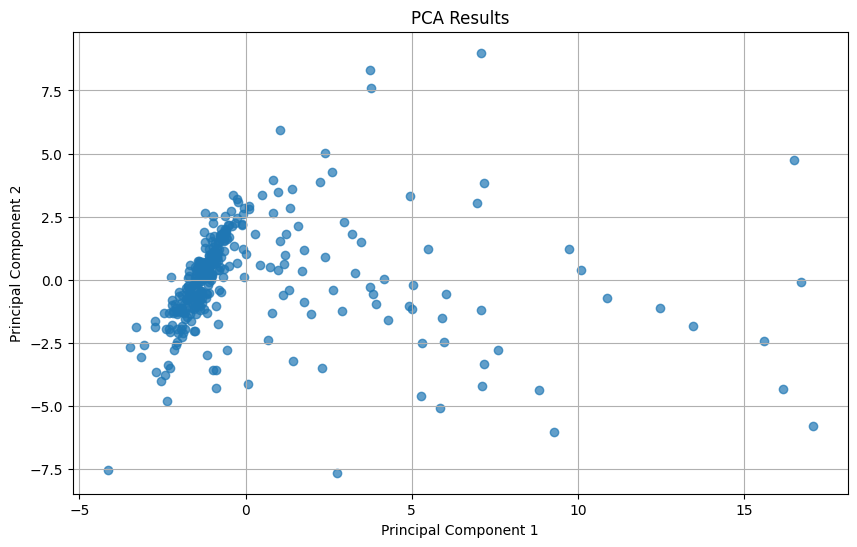

In [10]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], alpha=0.7)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [16]:
df_merged = pd.concat([data, pca_df], axis=1)


In [6]:
df_merged

,geography,geography code,NS-SeC: All categories: NS-SeC; Migration: Net migration within the UK; measures: Value,"NS-SeC: 1. Higher managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value","NS-SeC: 2. Lower managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value",NS-SeC: 3. Intermediate occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 4. Small employers and own account workers; Migration: Net migration within the UK; measures: Value,NS-SeC: 5. Lower supervisory and technical occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 6. Semi-routine occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 7. Routine occupations; Migration: Net migration within the UK; measures: Value,...,net migration excluding communal establishment population,Proportion: Net migration as a proportion of LA residents,Proportion: Net migration (excluding students) as a proportion of LA residents,Proportion: Net migration (excluding communal establishment population) as a proportion of LA residents,Average IMD Decile,Absolute migration all NS-SeC,Proportion: Student migration as a proportion of total absolute migration,Proportion: Student migration as a proportion of local authority population,PCA1,PCA2
0,Darlington,E06000005,-166.0,17.0,37.0,121.0,-16.0,11.0,37.0,70.0,...,-163.715149,-0.157251,0.293661,-0.155086,5,818.0,58.190709,0.450911,-1.286767,0.098834
1,County Durham,E06000047,1096.0,-342.0,-411.0,-275.0,90.0,74.0,-31.0,98.0,...,1068.337447,0.213544,-0.135803,0.208155,4,3214.0,55.787181,0.349348,2.898479,-1.228165
2,Hartlepool,E06000001,-212.0,-41.0,-28.0,-3.0,-2.0,14.0,47.0,6.0,...,-209.841483,-0.230365,0.070631,-0.228019,4,490.0,56.530612,0.300995,-1.001567,0.694895
3,Middlesbrough,E06000002,260.0,-100.0,-146.0,-165.0,-36.0,-108.0,-149.0,-95.0,...,255.762217,0.187845,-0.579430,0.184783,3,1864.0,56.974249,0.767275,2.377056,0.912556
4,Northumberland,E06000057,-405.0,147.0,228.0,100.0,172.0,83.0,247.0,154.0,...,-398.032310,-0.128153,0.356930,-0.125948,6,2667.0,57.480315,0.485084,-2.174141,-1.246481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Caerphilly,W06000018,-428.0,-64.0,11.0,52.0,-6.0,36.0,66.0,13.0,...,-425.484268,-0.239366,0.052571,-0.237959,3,784.0,66.581633,0.291937,-0.867907,0.872895
341,Blaenau Gwent,W06000019,-262.0,-20.0,-51.0,-21.0,-16.0,-1.0,17.0,-10.0,...,-259.842123,-0.375283,-0.097402,-0.372192,4,364.0,53.296703,0.277881,-0.795317,1.212481
342,Torfaen,W06000020,-298.0,3.0,-33.0,11.0,-11.0,-12.0,2.0,42.0,...,-295.660500,-0.327203,0.012078,-0.324634,4,432.0,71.527778,0.339281,-0.824680,1.070508
343,Monmouthshire,W06000021,-287.0,135.0,156.0,16.0,61.0,-3.0,55.0,56.0,...,-281.880556,-0.314269,0.488376,-0.308663,9,1245.0,58.875502,0.802646,-1.495488,-0.074633


<ipython-input-26-5e85c87a16d3>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)


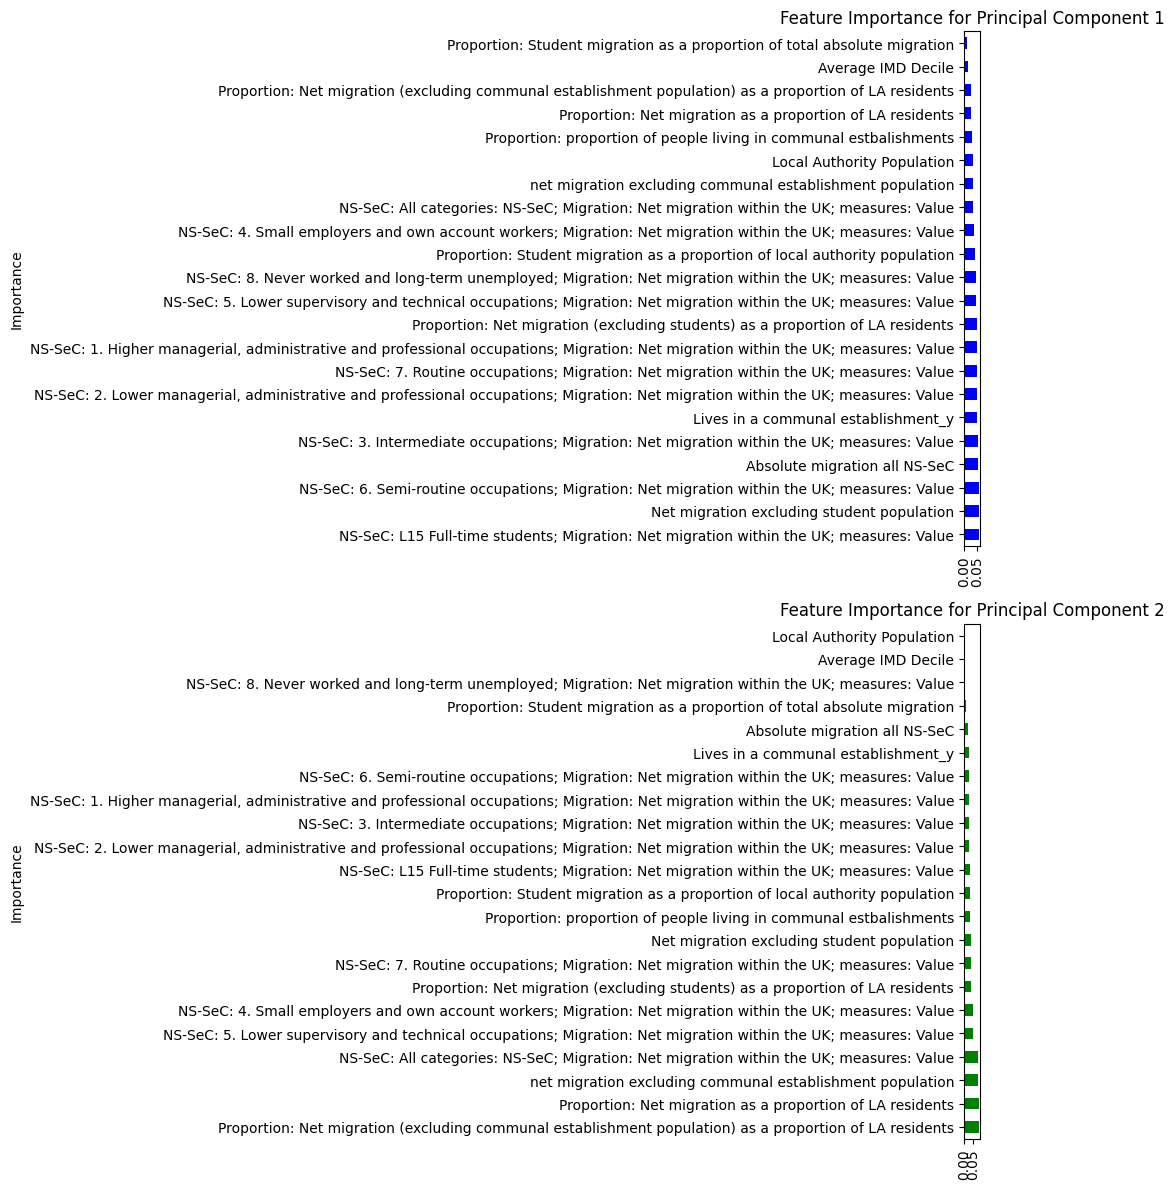

In [26]:
Calculate feature importances from the PCA components
feature_importances_pca1 = abs(pca.components_[0])
feature_importances_pca2 = abs(pca.components_[1])

# Create a DataFrame to store these importances along with feature names
features = data_prepared.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance for PCA1': feature_importances_pca1,
    'Importance for PCA2': feature_importances_pca2
})

# Plotting the feature importances
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
importances_df.sort_values('Importance for PCA1', ascending=False).plot(
    x='Feature', y='Importance for PCA1', kind='bar', ax=axes[0], color='b', legend=False)
axes[0].set_title('Feature Importance for Principal Component 1')
axes[0].set_ylabel('Importance')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

importances_df.sort_values('Importance for PCA2', ascending=False).plot(
    x='Feature', y='Importance for PCA2', kind='bar', ax=axes[1], color='g', legend=False)
axes[1].set_title('Feature Importance for Principal Component 2')
axes[1].set_ylabel('Importance')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Calculate feature importances from the PCA components
feature_importances_pca1 = abs(pca.components_[0])
feature_importances_pca2 = abs(pca.components_[1])

# Create a DataFrame to store these importances along with feature names
features = data_prepared.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance for PCA1': feature_importances_pca1,
    'Importance for PCA2': feature_importances_pca2
})

In [22]:
importances_df

,Feature,Importance for PCA1,Importance for PCA2
0,NS-SeC: All categories: NS-SeC; Migration: Net...,0.177249,0.370201
1,"NS-SeC: 1. Higher managerial, administrative a...",0.241769,0.143687
2,"NS-SeC: 2. Lower managerial, administrative an...",0.245622,0.147142
3,NS-SeC: 3. Intermediate occupations; Migration...,0.258500,0.143941
4,NS-SeC: 4. Small employers and own account wor...,0.187581,0.233368
5,NS-SeC: 5. Lower supervisory and technical occ...,0.219371,0.241535
6,NS-SeC: 6. Semi-routine occupations; Migration...,0.271067,0.134142
7,NS-SeC: 7. Routine occupations; Migration: Net...,0.243538,0.181612
8,NS-SeC: 8. Never worked and long-term unemploy...,0.215814,0.042614
9,NS-SeC: L15 Full-time students; Migration: Net...,0.282885,0.152673


In [43]:
import pandas as pd


# index of the highest importance for each PCA component
idx_max_pca1 = importances_df['Importance for PCA1'].idxmax()
idx_max_pca2 = importances_df['Importance for PCA2'].idxmax()

# Retrieve the feature names with the highest importance
feature_max_pca1 = importances_df.loc[idx_max_pca1, 'Feature']
feature_max_pca2 = importances_df.loc[idx_max_pca2, 'Feature']

print(f"The feature with the highest importance for PCA1 is: {feature_max_pca1}")
print(f"The feature with the highest importance for PCA2 is: {feature_max_pca2}")


The feature with the highest importance for PCA1 is: NS-SeC: L15 Full-time students; Migration: Net migration within the UK; measures: Value
The feature with the highest importance for PCA2 is: Proportion: Net migration (excluding communal establishment population) as a proportion of LA residents


In [34]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2,perplexity = 15,random_state=42)  # Using 2 components for visualization
tsne_result = tsne.fit_transform(data_prepared)

# Create a DataFrame for the t-SNE result
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

tsne_df.head()

,TSNE1,TSNE2
0,1.411914,2.270143
1,13.852437,-13.149858
2,15.075580,2.433085
3,16.777279,-19.130342
4,-31.541651,9.613908


In [35]:
df_NSSEC_PCA_TSNE = pd.concat([df_merged, tsne_df], axis=1)
df_NSSEC_PCA_TSNE.to_csv('nssecpcatsne.csv',index = False)

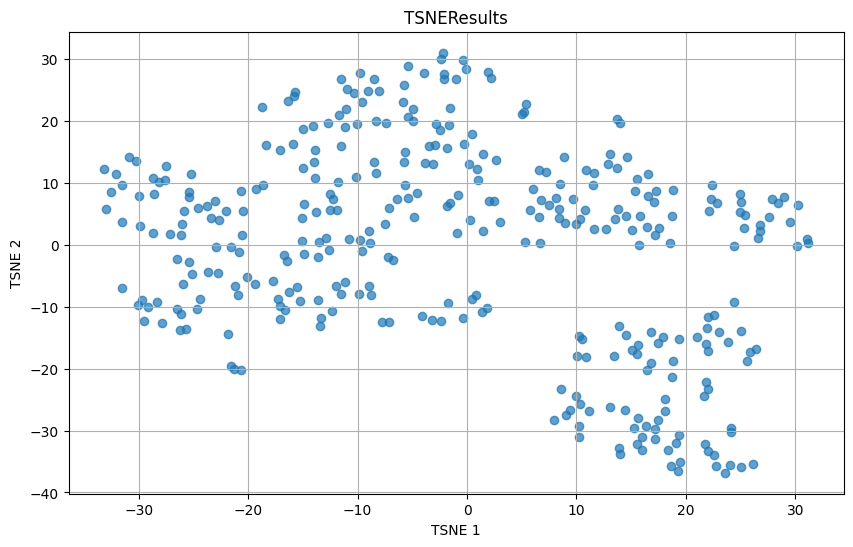

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], alpha=0.7)
plt.title('TSNEResults')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.grid(True)
plt.show()

In [ ]:
# Add t-SNE coordinates to the DataFrame
tsne1 = tsne_result[:, 0]
tsne2 = tsne_result[:, 1]

pca1 = pca_result[:, 0]
pca2 = pca_result[:, 1]

column_names = ['TSNE1', 'TSNE2', 'PCA1', 'PCA2']

# Stack arrays horizontally (column-wise)
output_tsne_pca = pd.DataFrame(np.column_stack([tsne1, tsne2, pca1, pca2]), columns=column_names)



In [ ]:
output_tsne_pca.to_csv('tsne_pca_migrationbyNSSEC_2011_only.csv', index = False)

# migration age and sex 2011 vs 2021


In [ ]:
import pandas as pd

# Load the data from the Excel file
file_path = '/content/tsnemalefemale.xlsx'
#sheets = ['female 2011', 'male 2011', 'female 2021', 'male 2021']

df2011 = pd.read_excel(file_path, sheet_name='male 2011')  # Adjust the sheet name as necessary
df2021 = pd.read_excel(file_path, sheet_name='male 2021')  # Adjust the sheet name as necessary

# Add a 'Year' column to each DataFrame
#df2011['Year'] = '2011'
#df2021['Year'] = '2021'


In [ ]:
# Combine the data
combined_df = pd.concat([df2011, df2021])


In [ ]:
combined_df.drop(columns=['Unnamed: 1'], inplace=True)


In [ ]:
combined_df.to_csv('help_me.csv',index = False)

In [ ]:
combined_df

,Resident Age,"Proportion: Lived elsewhere one year ago, but within same local authority","Proportion: Lived elsewhere one year ago, outside of the local authority but within the UK",Proportion: Total who lived elsewhere one year ago within the UK (either within or outside of local authority),year
0,Aged 1 to 4 years,10.6,4.6,15.1,2011
1,Aged 5 to 9 years,6.8,2.7,9.5,2011
2,Aged 10 to 15 years,5.1,2.1,7.3,2011
3,Aged 16 to 24 years,12.0,11.3,23.3,2011
4,Aged 25 to 34 years,12.4,10.0,22.4,2011
5,Aged 35 to 49 years,5.9,4.2,10.1,2011
6,Aged 50 to 64 years,2.8,2.1,4.8,2011
7,Aged 65 to 74 years,1.7,1.4,3.1,2011
8,Aged 75 years and over,2.0,1.2,3.2,2011
0,Aged 1 to 4 years,8.3,4.8,13.1,2021


In [ ]:
from sklearn.manifold import TSNE

# Prepare data for t-SNE: selecting only numeric columns for t-SNE computation
tsne_data = combined_df.drop(columns=['Resident Age', 'year'])

adjusted_perplexity = len(tsne_data) // 2
# Run t-SNE
tsne = TSNE(n_components=2,perplexity=adjusted_perplexity ,random_state=42)
tsne_results = tsne.fit_transform(tsne_data)



# Save to CSV for Tableau visualization

#tsne_df.to_csv('tsne_male.csv', index=False)




In [ ]:
# Add t-SNE coordinates to the DataFrame
combined_df['TSNE-1'] = tsne_results[:, 0]
combined_df['TSNE-2'] = tsne_results[:, 1]


In [ ]:
# Add t-SNE coordinates to the DataFram
combined_df.to_csv('male_tsne.csv', index = False)

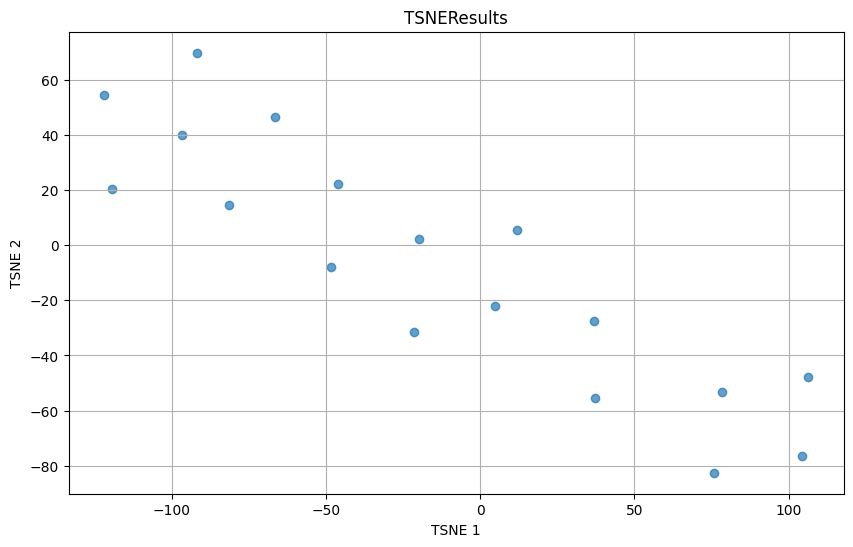

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot of the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['TSNE-1'], combined_df['TSNE-2'], alpha=0.7)
plt.title('TSNEResults')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.grid(True)
plt.show()

Cluster centers:
 [[ 0.29455128  1.78762177]
 [ 8.93087018 -1.53692313]
 [-1.45705788 -0.80102354]]
Cluster labels:
 [2 0 2 0 2 0 2 2 1 2 2 0 0 0 2 0 0 2 2 0 2 2 2 2 0 0 1 0 0 2 0 0 0 0 0 2 2
 0 1 0 1 0 0 0 0 2 0 1 0 0 0 2 0 0 0 1 2 2 0 2 2 2 2 2 2 0 1 0 2 0 1 0 0 1
 1 0 2 2 2 2 2 0 2 2 0 1 2 2 2 2 0 0 2 1 2 2 2 2 2 2 2 2 0 0 0 2 2 0 2 0 2
 2 2 2 0 0 0 2 2 0 2 2 2 0 0 0 2 2 2 1 1 0 0 0 2 0 2 2 0 2 0 0 2 2 0 0 2 2
 1 2 2 2 2 0 2 2 0 2 0 2 0 0 2 2 2 2 2 2 0 2 2 2 0 2 1 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 1 2 2 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0
 2 1 2 2 2 1 0 2 1 0 2 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 0 2 1 2 2 2
 2 0 2 2 2 2 2 1 2 2 2 2 2 0 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 2 1 2 0 2 1 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1
 2 2 0 0 2 1 0 0 0 0 2 0]


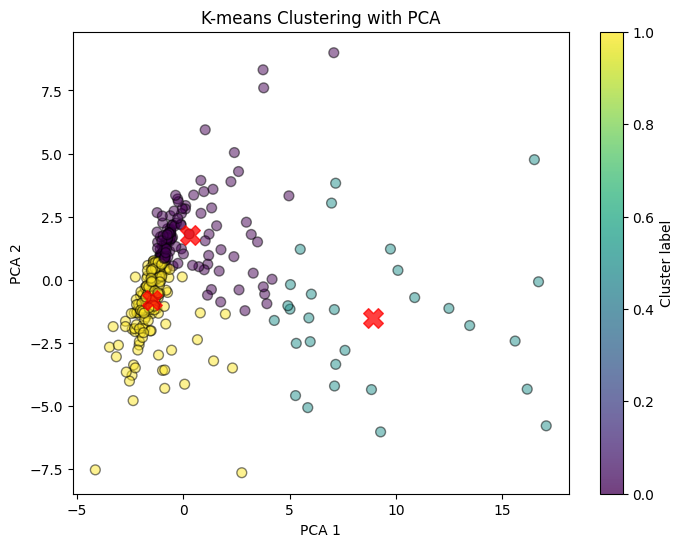

In [ ]:
import numpy as np
import pandas as pd

# Extracting the PCA results to numpy array
X = df_NSSEC_PCA_TSNE[['PCA1', 'PCA2']].values
from sklearn.cluster import KMeans

# Number of clusters
k = 3  # Example: set to 3, adjust based on your specific needs or analysis

# Creating the KMeans object with k clusters, random initialization, and n_init=10 for more stable results
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)

# Fitting the model
kmeans.fit(X)

# Getting the cluster labels for each data point
labels = kmeans.labels_
# Cluster centers
centers = kmeans.cluster_centers_

print("Cluster centers:\n", centers)
print("Cluster labels:\n", labels)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Marking the centers
plt.title('K-means Clustering with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster label')
plt.show()


Cluster labels:
 [2 0 2 0 1 2 1 1 0 1 1 0 2 2 1 0 2 2 2 2 1 2 2 1 2 2 0 2 2 1 2 2 2 2 2 1 1
 2 0 2 0 2 2 2 0 2 0 0 2 2 2 1 0 2 2 0 1 2 2 1 1 1 2 1 2 2 0 0 2 0 0 2 0 0
 0 2 1 2 2 1 1 2 1 1 2 0 1 2 1 2 2 2 1 0 2 2 1 2 1 1 2 1 0 2 2 1 2 2 2 2 2
 0 2 1 0 0 2 2 2 0 2 0 1 2 2 2 1 2 0 0 0 2 2 2 2 0 1 2 2 0 2 2 1 1 0 2 1 1
 0 1 2 1 1 2 1 2 2 2 0 2 2 2 2 1 1 1 1 2 2 1 1 1 2 1 0 1 1 2 1 1 0 1 2 1 1
 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 2 2 0 0 1 1 0 2 0 0 2 0 0 0 2 2 1 2 0
 1 0 1 1 1 0 0 2 0 2 2 2 1 2 2 1 1 1 1 1 1 1 2 1 2 1 2 2 1 1 1 0 1 0 1 2 2
 1 2 1 1 2 1 2 0 2 2 1 1 1 0 2 1 0 1 2 2 2 2 1 1 1 1 2 1 1 0 0 0 1 2 1 0 1
 1 1 1 1 1 0 2 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 0 1 2 2 1 2 0
 1 1 0 2 1 0 2 2 2 2 1 0]


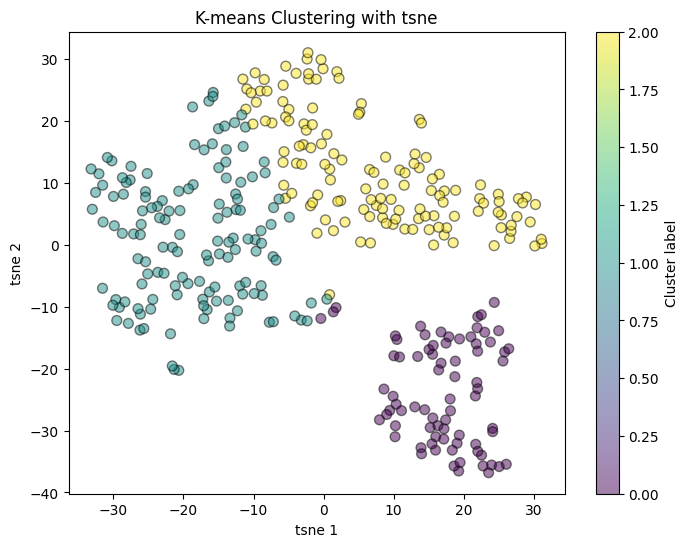

In [36]:
import numpy as np
import pandas as pd

# Extracting the PCA results to numpy array
Y = df_NSSEC_PCA_TSNE[['TSNE1', 'TSNE2']].values
from sklearn.cluster import KMeans

# Number of clusters
k = 3  # Example: set to 3, adjust based on your specific needs or analysis

# Creating the KMeans object with k clusters, random initialization, and n_init=10 for more stable results
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)

# Fitting the model
kmeans.fit(Y)

# Getting the cluster labels for each data point
tsne_labels = kmeans.labels_

print("Cluster labels:\n", tsne_labels)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(Y[:, 0], Y[:, 1], c=tsne_labels, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.5)

plt.title('K-means Clustering with tsne')
plt.xlabel('tsne 1')
plt.ylabel('tsne 2')
plt.colorbar(label='Cluster label')
plt.show()

In [37]:
df_NSSEC_PCA_TSNE['tsne_clusters'] = tsne_labels
#df_NSSEC_PCA_TSNE['pca_clusters'] = labels

In [40]:
df_NSSEC_PCA_TSNE

,geography,geography code,NS-SeC: All categories: NS-SeC; Migration: Net migration within the UK; measures: Value,"NS-SeC: 1. Higher managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value","NS-SeC: 2. Lower managerial, administrative and professional occupations; Migration: Net migration within the UK; measures: Value",NS-SeC: 3. Intermediate occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 4. Small employers and own account workers; Migration: Net migration within the UK; measures: Value,NS-SeC: 5. Lower supervisory and technical occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 6. Semi-routine occupations; Migration: Net migration within the UK; measures: Value,NS-SeC: 7. Routine occupations; Migration: Net migration within the UK; measures: Value,...,Proportion: Net migration (excluding communal establishment population) as a proportion of LA residents,Average IMD Decile,Absolute migration all NS-SeC,Proportion: Student migration as a proportion of total absolute migration,Proportion: Student migration as a proportion of local authority population,PCA1,PCA2,TSNE1,TSNE2,tsne_clusters
0,Darlington,E06000005,-166.0,17.0,37.0,121.0,-16.0,11.0,37.0,70.0,...,-0.155086,5,818.0,58.190709,0.450911,-1.286767,0.098834,1.411914,2.270143,2
1,County Durham,E06000047,1096.0,-342.0,-411.0,-275.0,90.0,74.0,-31.0,98.0,...,0.208155,4,3214.0,55.787181,0.349348,2.898479,-1.228165,13.852437,-13.149858,0
2,Hartlepool,E06000001,-212.0,-41.0,-28.0,-3.0,-2.0,14.0,47.0,6.0,...,-0.228019,4,490.0,56.530612,0.300995,-1.001567,0.694895,15.075580,2.433085,2
3,Middlesbrough,E06000002,260.0,-100.0,-146.0,-165.0,-36.0,-108.0,-149.0,-95.0,...,0.184783,3,1864.0,56.974249,0.767275,2.377056,0.912556,16.777279,-19.130342,0
4,Northumberland,E06000057,-405.0,147.0,228.0,100.0,172.0,83.0,247.0,154.0,...,-0.125948,6,2667.0,57.480315,0.485084,-2.174141,-1.246481,-31.541651,9.613908,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,Caerphilly,W06000018,-428.0,-64.0,11.0,52.0,-6.0,36.0,66.0,13.0,...,-0.237959,3,784.0,66.581633,0.291937,-0.867907,0.872895,12.726696,2.470208,2
341,Blaenau Gwent,W06000019,-262.0,-20.0,-51.0,-21.0,-16.0,-1.0,17.0,-10.0,...,-0.372192,4,364.0,53.296703,0.277881,-0.795317,1.212481,16.430376,2.825729,2
342,Torfaen,W06000020,-298.0,3.0,-33.0,11.0,-11.0,-12.0,2.0,42.0,...,-0.324634,4,432.0,71.527778,0.339281,-0.824680,1.070508,10.300717,4.139097,2
343,Monmouthshire,W06000021,-287.0,135.0,156.0,16.0,61.0,-3.0,55.0,56.0,...,-0.308663,9,1245.0,58.875502,0.802646,-1.495488,-0.074633,-12.697096,19.713263,1


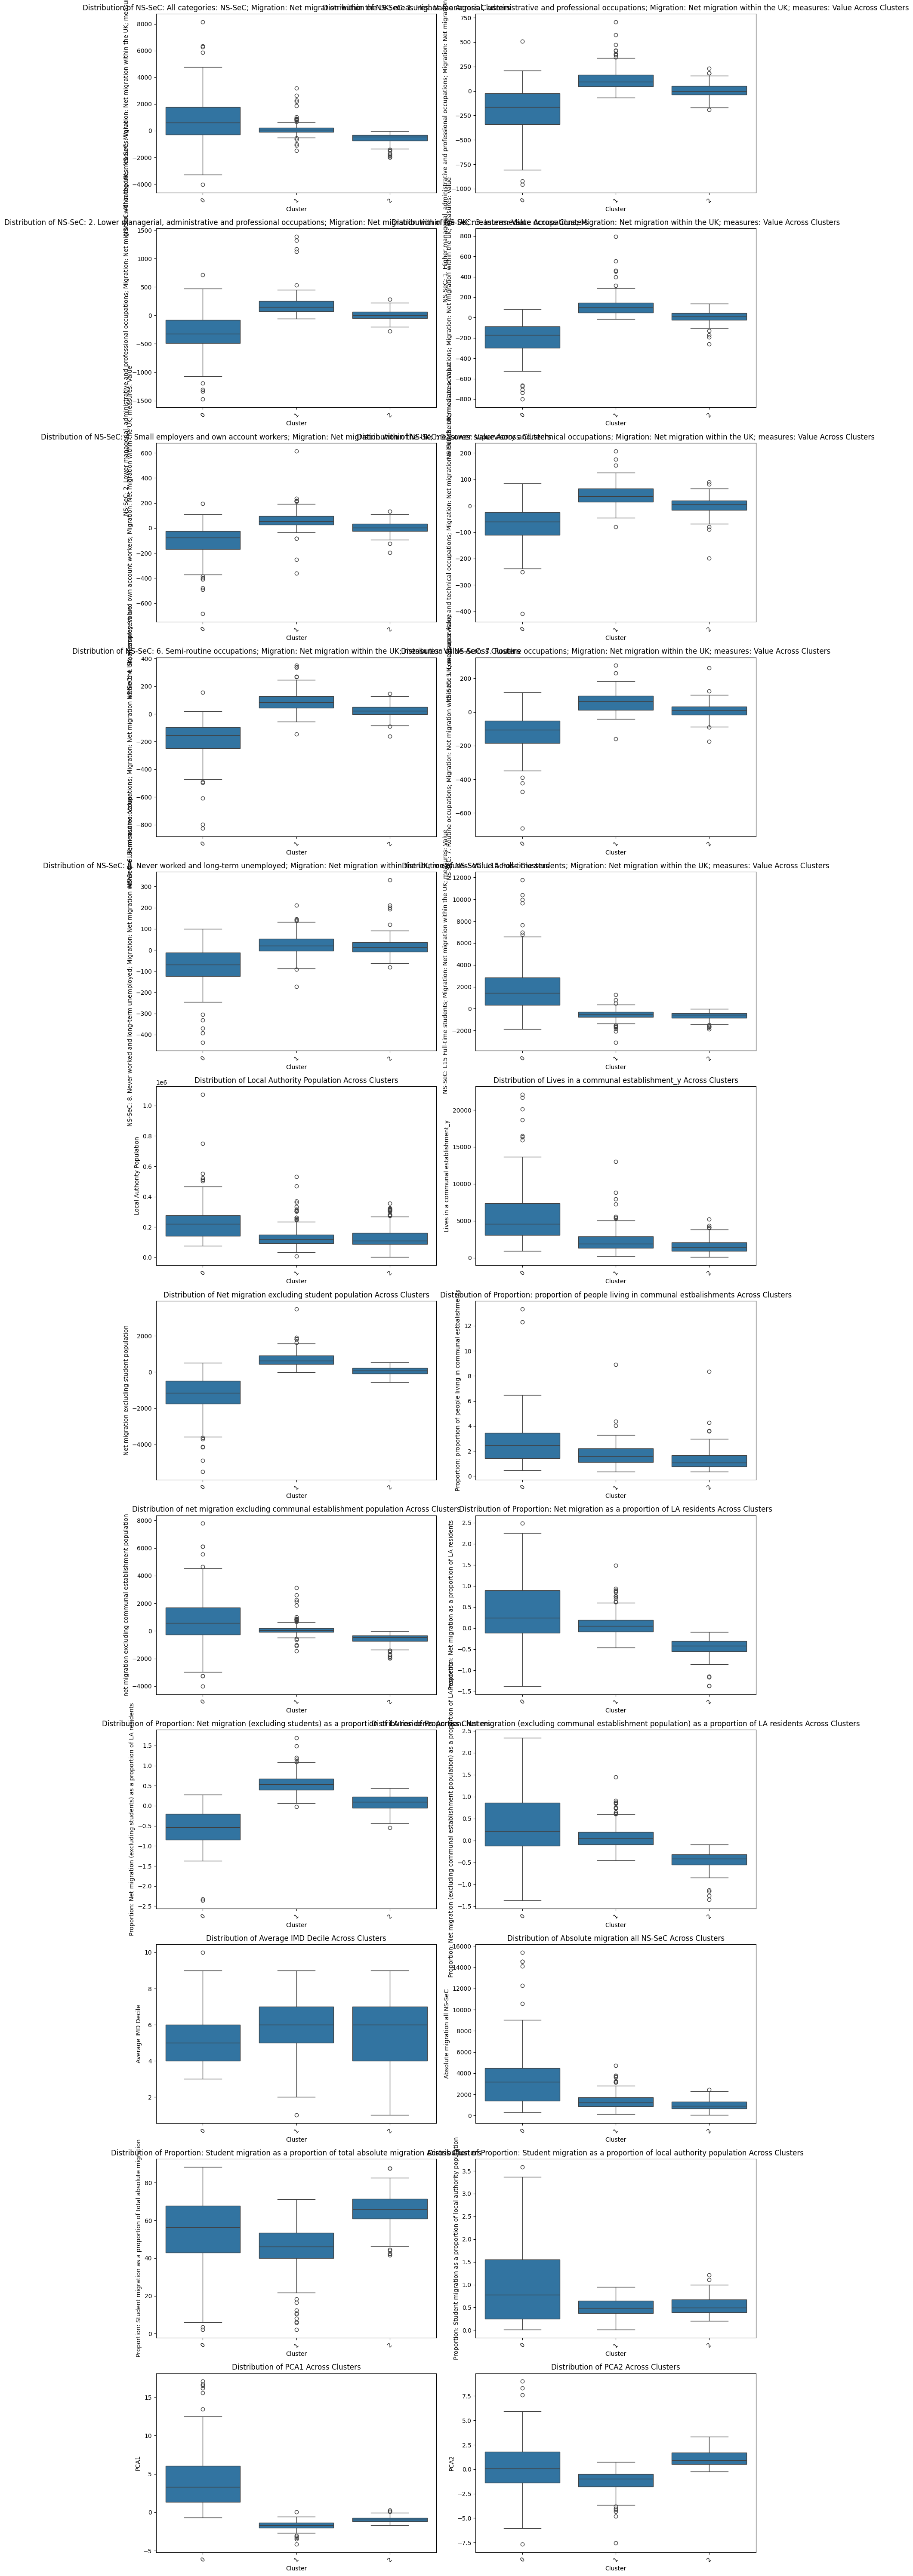

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_NSSEC_PCA_TSNE is already defined and includes the 'tsne_clusters' column

# Select only the numerical columns for analysis
# It automatically excludes non-numeric types including the 'tsne_clusters' if it's categorical or string
numerical_columns = df_NSSEC_PCA_TSNE.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df_NSSEC_PCA_TSNE[numerical_columns]

# Create a figure to hold the subplots
num_plots = len(numerical_columns)
num_columns = 2  # Define how many columns of subplots you want
num_rows = (num_plots + 1) // num_columns  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust overall figure size as needed

# Plotting each numerical feature in a separate subplot
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x='tsne_clusters', y=column, data=df_NSSEC_PCA_TSNE)
    plt.title(f'Distribution of {column} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary

plt.tight_layout()
plt.show()



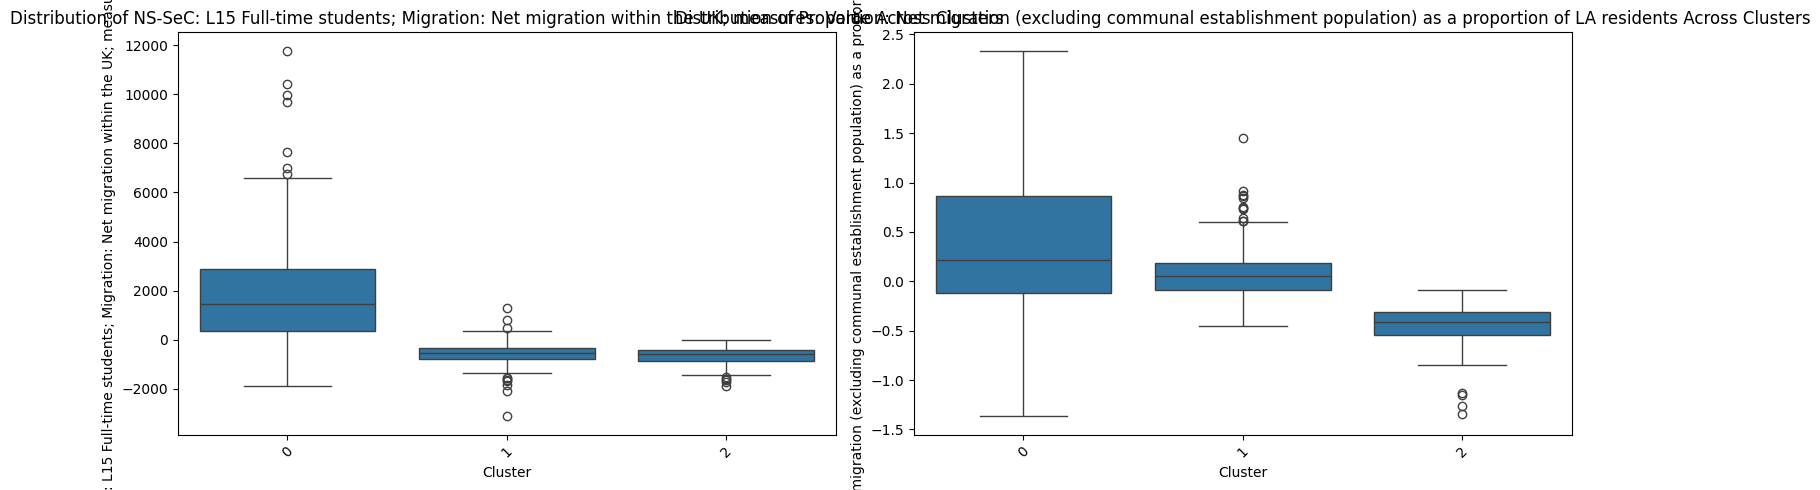

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_NSSEC_PCA_TSNE is already defined and includes the 'tsne_clusters' column

# Select only the relevant features for visualization
features_to_visualize = [feature_max_pca1, feature_max_pca2]  # These are the features with highest importance for PCA1 and PCA2
df_selected_features = df_NSSEC_PCA_TSNE[['tsne_clusters'] + features_to_visualize]

# Create a figure to hold the subplots
num_plots = len(features_to_visualize)
num_columns = 2  # Define how many columns of subplots you want
num_rows = (num_plots + 1) // num_columns  # Calculate the number of rows needed

plt.figure(figsize=(15, 5 * num_rows))  # Adjust overall figure size as needed

# Plotting each feature in a separate subplot
for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x='tsne_clusters', y=feature, data=df_selected_features)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if necessary

plt.tight_layout()
plt.show()


In [45]:
df_NSSEC_PCA_TSNE.to_csv('data_for_tableau_2may.csv', index=False)